In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load, encoding="utf-8")
ride_df = pd.read_csv(ride_data_to_load, encoding="utf-8")
# city_df.head()
# ride_df.head()

# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
merge_df.head()
# merge_df.count()
# merge_df["city"].value_counts()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
# check the range of total number of rides (x-axis) and average fare (y-axis)

# For urban cities, 
urban_df = merge_df.loc[merge_df["type"] == "Urban", :]
# urban_df.head()

# Find the range of total number of rides within the urban cities
urban_ride_counts = urban_df["city"].value_counts()
urban_max_ride = urban_ride_counts.max()
urban_min_ride = urban_ride_counts.min()

# Find the range of average fare within the urban cities
urban_city_df = urban_df.groupby(["city"])
urban_avg_fare = urban_city_df["fare"].mean()
urban_max_fare = urban_avg_fare.max()
urban_min_fare = urban_avg_fare.min()
# print(urban_avg_fare)

# Find the count of driver in each urban city
urban_driver = urban_city_df["driver_count"].unique()
urban_driver = urban_driver.str[0]
# print(urban_driver.head())

# Concatagate the three tables into one
urban_plot_df = pd.concat([urban_ride_counts, urban_avg_fare, urban_driver], axis=1)
urban_plot_df = pd.DataFrame(urban_plot_df)

print(urban_plot_df.head())
# urban_plot_df.dtypes

                 city       fare  driver_count
Amandaburgh        18  24.641667            12
Barajasview        22  25.332273            26
Carriemouth        27  28.314444            52
Christopherfurt    27  24.501852            41
Deanville          19  25.842632            49


C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [3]:
# For Suburban cities,
suburban_df = merge_df.loc[merge_df["type"] == "Suburban", :]
# print(suburban_df)

# Find the range of total number of rides within the suburban cities
suburban_ride_counts = suburban_df["city"].value_counts()
suburban_max_ride = suburban_ride_counts.max()
suburban_min_ride = suburban_ride_counts.min()

# Find the range of average fare within the suburban cities
suburban_city_df = suburban_df.groupby(["city"])
suburban_avg_fare = suburban_city_df["fare"].mean()
suburban_max_fare = suburban_avg_fare.max()
suburban_min_fare = suburban_avg_fare.min()

# Find the count of driver in each suburban city
suburban_driver = suburban_city_df["driver_count"].unique()
suburban_driver = suburban_driver.str[0]
# print(suburban_driver.head())

suburban_plot_df = pd.concat([suburban_ride_counts, suburban_avg_fare, suburban_driver], axis=1)
print(suburban_plot_df.head())

               city       fare  driver_count
Barronchester    16  36.422500            11
Bethanyland      18  32.956111            22
Brandonfort      19  35.437368            10
Colemanland      22  30.894545            23
Davidfurt        17  31.995882            23


C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
# For rural cities,
rural_df = merge_df.loc[merge_df["type"] == "Rural", :]
# Rural_df.head()

# Find the range of total number of rides within the rural cities
rural_ride_counts = rural_df["city"].value_counts()
rural_max_ride = rural_ride_counts.max()
rural_min_ride = rural_ride_counts.min()

# Find the range of average fare within the suburban cities
rural_city_df = rural_df.groupby(["city"])
rural_avg_fare = rural_city_df["fare"].mean()
rural_max_fare = rural_avg_fare.max()
rural_min_fare = rural_avg_fare.min()
# print(rural_max_fare)

# Find the count of driver in each rural city
rural_driver = rural_city_df["driver_count"].unique()
rural_driver = rural_driver.str[0]
# print(suburban_driver.head())

rural_plot_df = pd.concat([rural_ride_counts, rural_avg_fare, rural_driver], axis=1)
print(rural_plot_df.head())

                city       fare  driver_count
Bradshawfurt      10  40.064000             7
Garzaport          3  24.123333             7
Harringtonfort     6  33.470000             4
Jessicaport        6  36.013333             1
Lake Jamie         6  34.358333             4


C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



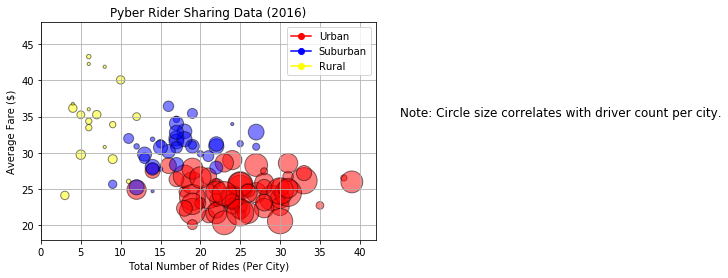

In [5]:
# Incorporate the other graph properties
plt.ylim(18, 48)
plt.xlim(0, 42)

# Create a title, x label, and y label for the chart
plt.title("Pyber Rider Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend_elements = [Line2D([0], [0], marker="o", color="red", label="Urban"),
                  Line2D([0], [0], marker="o", color="blue", label="Suburban"),
                  Line2D([0], [0], marker="o", color="yellow", label="Rural")]


plt.legend(handles=legend_elements, loc="upper right")

plt.grid(True)


# Incorporate a text label regarding circle size

plt.text(45, 35, "Note: Circle size correlates with driver count per city.", 
         fontsize=12)


# Build the scatter plots for each city types
plt.scatter(urban_plot_df["city"], urban_plot_df["fare"], marker="o", facecolors="red",
           edgecolors="black", alpha=0.50, s=(urban_plot_df["driver_count"]*10))

plt.scatter(suburban_plot_df["city"], suburban_plot_df["fare"], marker="o", facecolors="blue",
           edgecolors="black", alpha=0.50, s=(suburban_plot_df["driver_count"]*10))

plt.scatter(rural_plot_df["city"], rural_plot_df["fare"], marker="o", facecolors="yellow",
           edgecolors="black", alpha=0.50, s=(rural_plot_df["driver_count"]*10))

# Save Figure
plt.savefig("./Images/Pyber_Rider_Sharing_Data.jpeg")
plt.show()


## Total Fares by City Type

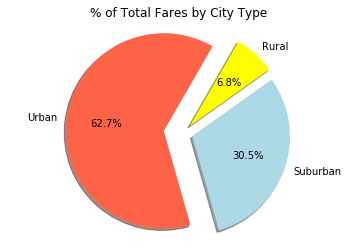

In [6]:
# Calculate Type Percents
total_fare = merge_df["fare"].sum()
urban_fare = urban_df["fare"].sum()
suburban_fare = suburban_df["fare"].sum()
rural_fare = rural_df["fare"].sum()

urban_percent = urban_fare / total_fare
suburban_percent = suburban_fare / total_fare
rural_percent = rural_fare / total_fare
# print(suburban_percent)

# Build Pie Chart
cat = ["Urban", "Suburban", "Rural"]
colors = ["tomato", "lightblue", "yellow"]
explode = (0.2, 0.1, 0.1)
percentage = [urban_percent, suburban_percent, rural_percent]

plt.pie(percentage, explode=explode, labels=cat, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=60)

plt.axis("equal")

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("./Images/Total_Fares_By_City.jpeg")
plt.show()

## Total Rides by City Type

0.6842105263157895


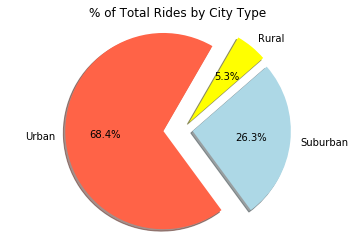

In [7]:
# Calculate Ride Percents
urban_ride_percent = len(urban_df) / len(merge_df)
suburban_ride_percent = len(suburban_df) / len(merge_df)
rural_ride_percent = len(rural_df) / len(merge_df)
print(urban_ride_percent)


# Build Pie Chart
cat = ["Urban", "Suburban", "Rural"]
colors = ["tomato", "lightblue", "yellow"]
explode = (0.2, 0.1, 0.1)
ride_percentage = [urban_ride_percent, suburban_ride_percent, rural_ride_percent]

plt.pie(ride_percentage, explode=explode, labels=cat, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=60)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("./Images/Total_Rides_By_City.jpeg")
plt.show()

## Total Drivers by City Type

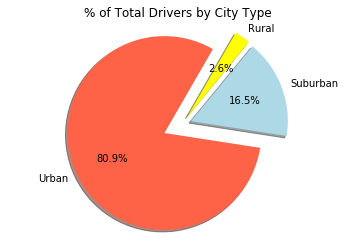

In [8]:
# Calculate Driver Percents
city = merge_df["city"].unique()
# print(city)
city_df = merge_df.set_index(["city"])
# city_df.head()
city_driver_df = city_df.groupby(level=city_df.index.names).last()
# city_driver_df["driver_count"].count()

# city_driver_df.head()
urban_driver_df = city_driver_df.loc[city_driver_df["type"] == "Urban", :]
suburban_driver_df = city_driver_df.loc[city_driver_df["type"] == "Suburban", :]
rural_driver_df = city_driver_df.loc[city_driver_df["type"] == "Rural", :]

# total_driver = city_driver_df["driver_count"].unique()
total_driver_count = city_driver_df["driver_count"].sum()
# print(total_driver_count)

# urban_driver = urban_driver_df["driver_count"].unique()
urban_driver_count = urban_driver_df["driver_count"].sum()
# print(urban_driver_count)

# suburban_driver = suburban_driver_df["driver_count"].unique()
suburban_driver_count = suburban_driver_df["driver_count"].sum()
# print(suburban_driver_count)

# rural_driver = rural_driver_df["driver_count"].unique()
rural_driver_count = rural_driver_df["driver_count"].sum()
# print(rural_driver_count)

urban_driver_percent = urban_driver_count / total_driver_count
suburban_driver_percent = suburban_driver_count / total_driver_count
rural_driver_percent = rural_driver_count / total_driver_count
# print(urban_driver_percent)

# Build Pie Charts
cat = ["Urban", "Suburban", "Rural"]
colors = ["tomato", "lightblue", "yellow"]
explode = (0.2, 0.1, 0.1)
driver_percentage = [urban_driver_percent, suburban_driver_percent, 
                     rural_driver_percent]

plt.pie(driver_percentage, explode=explode, labels=cat, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=60)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("./Images/Total_Drivers_By_City.jpeg")
plt.show()